In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


In [3]:
df= pd.read_csv('covid19_tweets.csv')

In [4]:
df


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [5]:
df.describe()


,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [7]:
df.text.head()

0    If I smelled the scent of hand sanitizers toda...
1    Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2    @diane3443 @wdunlap @realDonaldTrump Trump nev...
3    @brookbanktv The one gift #COVID19 has give me...
4    25 July : Media Bulletin on Novel #CoronaVirus...
Name: text, dtype: object

In [8]:
import re
import string

In [9]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def text_preprocessing(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [10]:
df['text_clean'] = df['text'].apply(str).apply(lambda x: text_preprocessing(x))


In [11]:
df['text_clean'].head

<bound method NDFrame.head of 0         if i smelled the scent of hand sanitizers toda...
1         hey yankees yankeespr and mlb wouldnt it have ...
2         wdunlap realdonaldtrump trump never once claim...
3         brookbanktv the one gift has give me is an app...
4         july media bulletin on novel coronavirusupdate...
                                ...                        
179103    thanks iamohmai for nominating me for the who ...
179104                             the year of insanity lol
179105    ctvnews a powerful painting by juan lucena its...
179106    more than students test positive for at major ...
179107                                  i stop when i see a
Name: text_clean, Length: 179108, dtype: object>

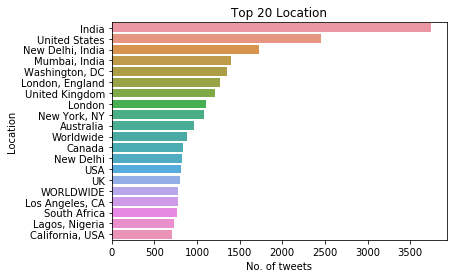

In [12]:
sns.barplot(df["user_location"].value_counts().values[0:20],
            df["user_location"].value_counts().index[0:20]);
plt.title("Top 20 Location")
plt.xlabel("No. of tweets")
plt.ylabel("Location")
plt.show()

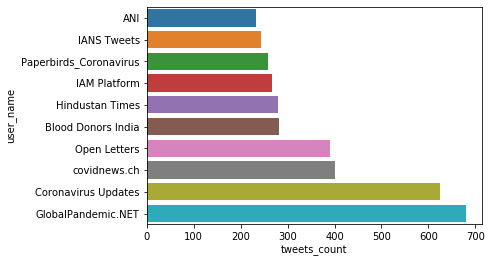

In [13]:
ds = df['user_name'].value_counts().reset_index()
ds.columns = ['user_name', 'tweets_count']
ds = ds.sort_values(['tweets_count'])
 
sns.barplot(x = 'tweets_count',y = 'user_name',data = ds.tail(10))

plt.show()


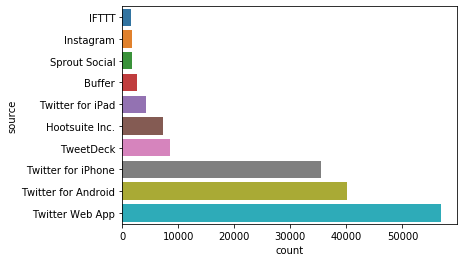

In [14]:
ds = df['source'].value_counts().reset_index()
ds.columns = ['source', 'count']
ds = ds.sort_values(['count'])
sns.barplot(x= 'count', y='source', data= ds.tail(10))

In [15]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
sentiment_scores = df['text_clean'].apply(lambda x: sid.polarity_scores(x))
sent_scores_df = pd.DataFrame(list(sentiment_scores))
sent_scores_df.tail

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<bound method NDFrame.tail of           neg    neu    pos  compound
0       0.000  0.856  0.144    0.4939
1       0.065  0.829  0.106    0.2263
2       0.130  0.870  0.000   -0.2732
3       0.000  0.733  0.267    0.7351
4       0.000  0.777  0.223    0.3182
...       ...    ...    ...       ...
179103  0.000  0.805  0.195    0.4404
179104  0.389  0.316  0.295   -0.2263
179105  0.161  0.714  0.125   -0.2023
179106  0.000  0.735  0.265    0.5574
179107  0.524  0.476  0.000   -0.2960

[179108 rows x 4 columns]>

In [16]:
sent_scores_df['val'] = sent_scores_df['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sent_scores_df.head()

,neg,neu,pos,compound,val
0,0.000,0.856,0.144,0.4939,positive
1,0.065,0.829,0.106,0.2263,positive
2,0.130,0.870,0.000,-0.2732,negative
3,0.000,0.733,0.267,0.7351,positive
4,0.000,0.777,0.223,0.3182,positive


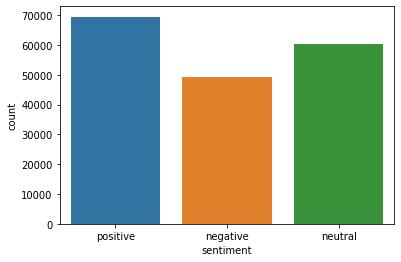

In [17]:
sent_counts = pd.DataFrame.from_dict(Counter(sent_scores_df['val']), orient = 'index').reset_index()
sent_counts.columns = ['sentiment', 'count']
sns.barplot(y="count", x='sentiment', data=sent_counts)
plt.show()

In [18]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [19]:
unigrams = get_top_n_gram(df['text_clean'],(1,1),10)
unigram_df = pd.DataFrame(unigrams, columns = ['Text' , 'count']) 


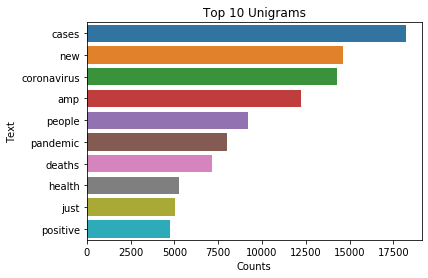

In [20]:
sns.barplot(unigram_df["count"],unigram_df["Text"])
plt.title("Top 10 Unigrams")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.show()

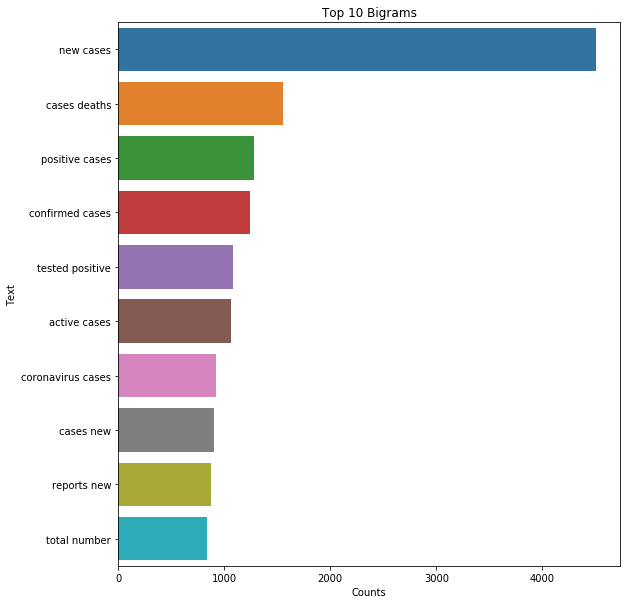

In [21]:
bigrams = get_top_n_gram(df['text_clean'],(2,2),10)
bigram_df = pd.DataFrame(bigrams, columns = ['Text' , 'count'])
plt.figure(figsize=(9,10))
sns.barplot(bigram_df["count"],bigram_df["Text"])
plt.title("Top 10 Bigrams")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.show()

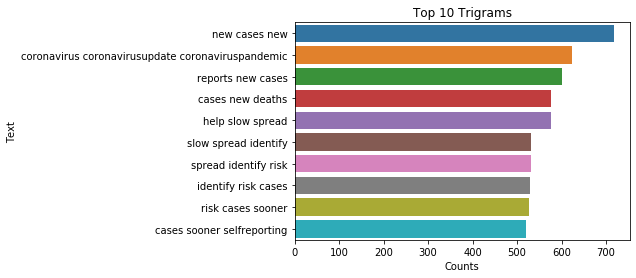

In [22]:
trigrams = get_top_n_gram(df['text_clean'],(3,3),10)
trigram_df = pd.DataFrame(trigrams, columns = ['Text' , 'count'])
sns.barplot(trigram_df["count"],trigram_df["Text"])
plt.title("Top 10 Trigrams")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.show()

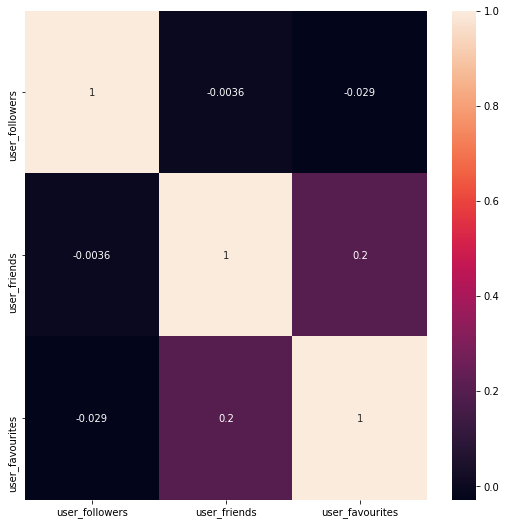

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(df.drop(["is_retweet","user_verified"], axis = 1).corr(), annot=True)
plt.show()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211:

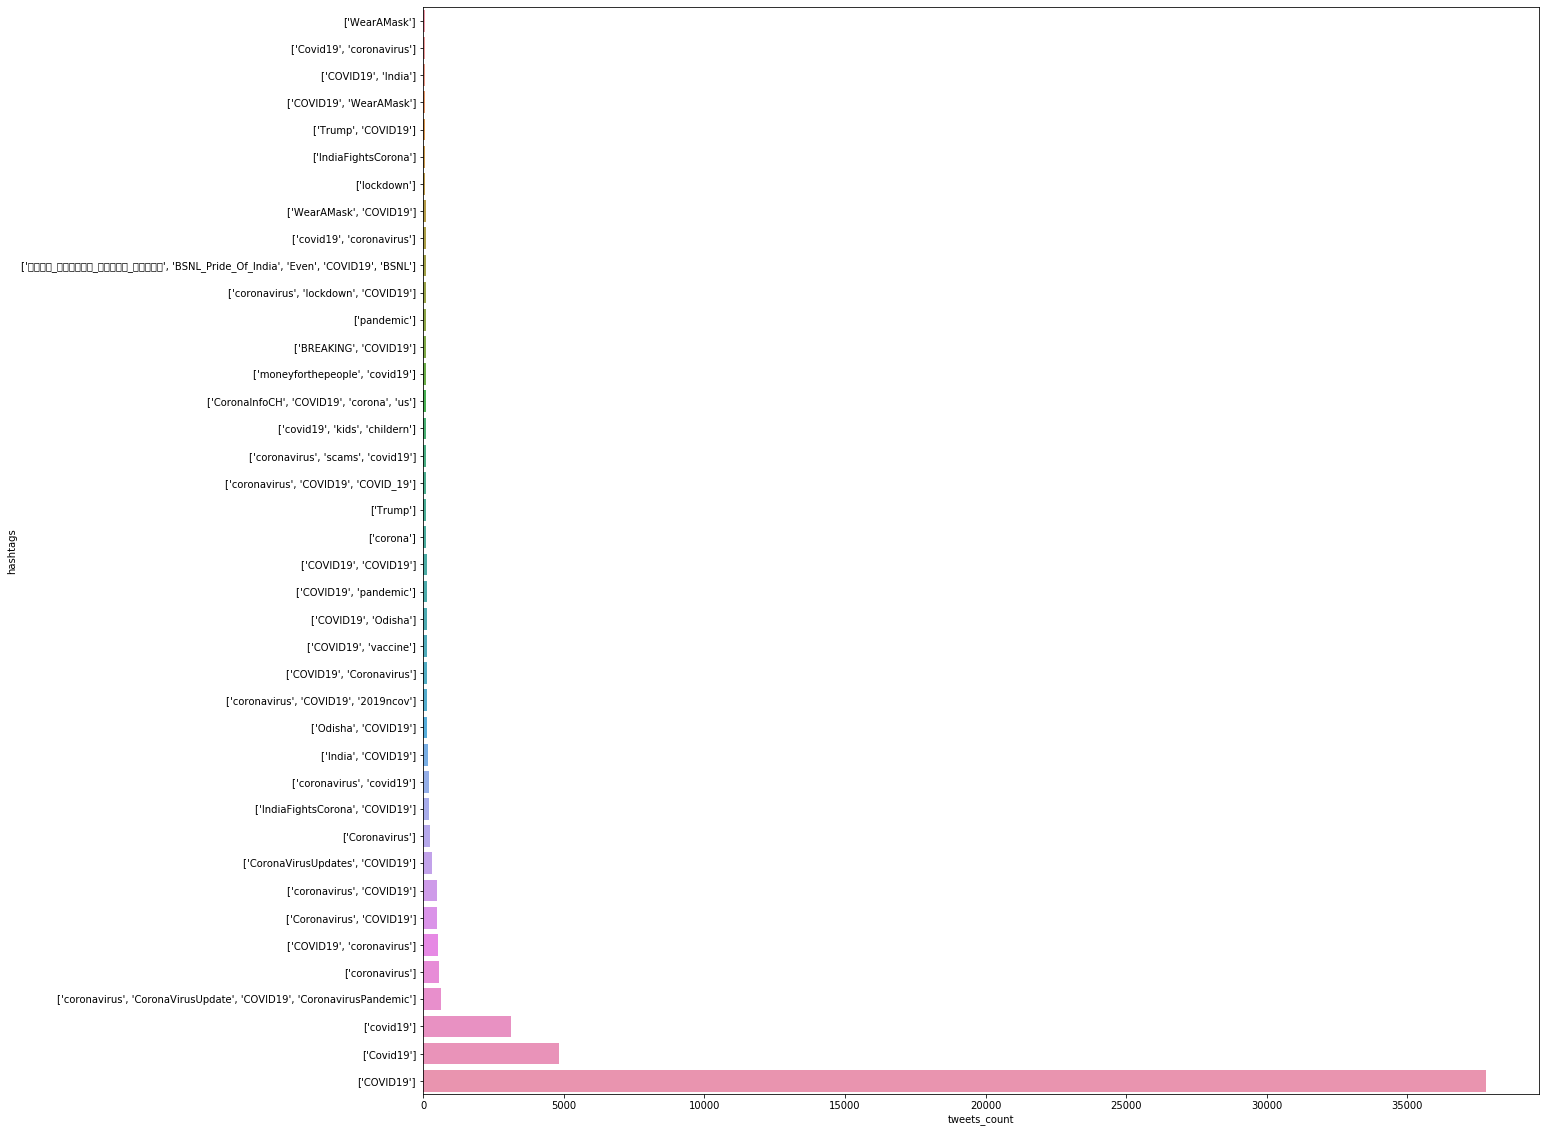

In [26]:
plt.figure(figsize=(20,20))

ds = df['hashtags'].value_counts().reset_index()
ds.columns = ['hashtags', 'tweets_count']
ds = ds.sort_values(['tweets_count'])
 
sns.barplot(x = 'tweets_count',y = 'hashtags',data = ds.tail(40))

plt.show()



pandas.core.indexes.base.Index